#### Import necessary libraries

In [2]:
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16 #resnet50 Resnet50
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
from keras import layers
from keras.applications import vgg16,inception_v3, resnet50

#### mounting google drive

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


#### defining VGG16 model

In [6]:
IMAGE_SIZE=[224,224]

In [8]:
vgg=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [9]:
for layer in vgg.layers:
  layer.trainable=False

In [14]:
# Transfer learning
model_vgg = Sequential()
# model.add(vgg_model = vgg16.VGG16(weights='imagenet'))
model_vgg.add(vgg)
model_vgg.add(Dense(256, activation='relu'))
model_vgg.add(layers.Dropout(rate=0.5))
model_vgg.add(Dense(128, activation='sigmoid'))
model_vgg.add(layers.Dropout(rate=0.2))
model_vgg.add(Dense(128, activation='relu'))
model_vgg.add(layers.Dropout(0.1))
model_vgg.add(Flatten())
model_vgg.add(Dense(2,activation="softmax"))

In [15]:
model_vgg.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
dense_5 (Dense)              (None, 7, 7, 256)         131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 256)         0         
_________________________________________________________________
dense_6 (Dense)              (None, 7, 7, 128)         32896     
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
dense_7 (Dense)              (None, 7, 7, 128)         16512     
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 128)        

In [16]:
model_vgg.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#### definig ImageDataGen objects for data augmentation

In [17]:
# image augmentation
train_datagen=ImageDataGenerator(rescale=1.0/255,
                                 rotation_range=180,
                                 horizontal_flip = True)
test_datagen=ImageDataGenerator(rescale=1.0/255)

In [ ]:
train_path='/content/drive/MyDrive/Datasets/cataract_detection/train'
valid_path='/content/drive/MyDrive/Datasets/cataract_detection/test'

In [18]:
training_set=train_datagen.flow_from_directory(train_path,
                                               target_size=(224,224),
                                          class_mode='categorical',
                                          batch_size=32)

Found 840 images belonging to 2 classes.


In [19]:
test_set=test_datagen.flow_from_directory(valid_path,
                                          target_size=(224,224),
                                          class_mode='categorical',
                                          batch_size=32)

Found 241 images belonging to 2 classes.


#### fitting the model

In [22]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [23]:

earlystop = EarlyStopping(monitor = 'val_accuracy', # value being monitored for improvement
                          min_delta = 0, #Abs value and is the min change required before we stop
                          patience = 10, #Number of epochs we wait before stopping 
                          verbose = 1,
                        restore_best_weights = True,mode='max') 

In [28]:
z_cont=model_vgg.fit_generator(training_set,validation_data=test_set,epochs=30,callbacks=earlystop)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
27/27 [==============================] - 61s 2s/step - loss: 0.4401 - accuracy: 0.8274 - val_loss: 0.2919 - val_accuracy: 0.9046
Epoch 2/30
27/27 [==============================] - 61s 2s/step - loss: 0.4390 - accuracy: 0.8345 - val_loss: 0.3067 - val_accuracy: 0.8963
Epoch 3/30
27/27 [==============================] - 63s 2s/step - loss: 0.4160 - accuracy: 0.8417 - val_loss: 0.2401 - val_accuracy: 0.9129
Epoch 4/30
27/27 [==============================] - 64s 2s/step - loss: 0.4076 - accuracy: 0.8393 - val_loss: 0.2443 - val_accuracy: 0.9129
Epoch 5/30
27/27 [==============================] - 65s 2s/step - loss: 0.4019 - accuracy: 0.8321 - val_loss: 0.2725 - val_accuracy: 0.9004
Epoch 6/30
27/27 [==============================] - 63s 2s/step - loss: 0.4212 - accuracy: 0.8298 - val_loss: 0.2363 - val_accuracy: 0.9295
Epoch 7/30
27/27 [==============================] - 62s 2s/step - loss: 0.3964 - accuracy: 0.8429 - val_loss: 0.2261 - val_accuracy: 0.9295
Epoch 8/30
27/27 [==

In [30]:
import matplotlib.pyplot as plt

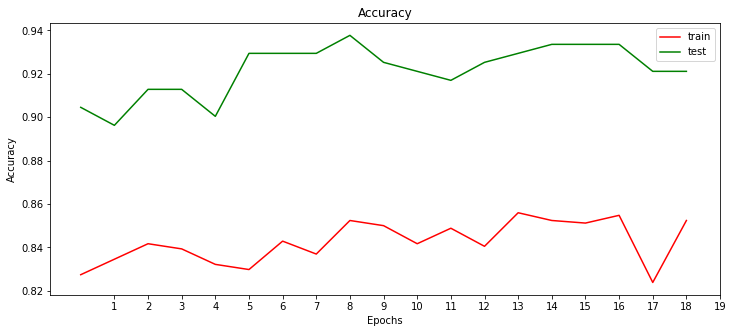

In [32]:
plt.figure(figsize=(12,5))
plt.title('Accuracy')
plt.plot(z_cont.history['accuracy'],'r-', label='train')
plt.plot(z_cont.history['val_accuracy'],'g-', label='test')
plt.xticks([i for i in range(1,20)],[i for i in range(1,20)])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show();

In [ ]:
import matplotlib.pyplot as plt

In [33]:
model_vgg.save("/content/drive/MyDrive/Datasets/Eye Dissease/models/vgg_augmented_9378.h5")

#### Inception V3


In [34]:
inception = inception_v3.InceptionV3(
    weights='imagenet', 
    include_top=False,  
    input_shape=(224,224,3)
)

87924736/87910968 [==============================] - 0s 0us/step


#### Defining model

In [35]:
model_inc = Sequential()
model_inc.add(inception)
model_inc.add(Dense(256, activation='relu'))
model_inc.add(layers.Dropout(rate=0.5))
model_inc.add(Dense(128, activation='sigmoid'))
model_inc.add(layers.Dropout(rate=0.2))
model_inc.add(Dense(128, activation='relu'))
model_inc.add(layers.Dropout(0.1))
model_inc.add(Flatten())
model_inc.add(Dense(2,activation="softmax"))

In [36]:
model_inc.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
dense_9 (Dense)              (None, 5, 5, 256)         524544    
_________________________________________________________________
dropout_6 (Dropout)          (None, 5, 5, 256)         0         
_________________________________________________________________
dense_10 (Dense)             (None, 5, 5, 128)         32896     
_________________________________________________________________
dropout_7 (Dropout)          (None, 5, 5, 128)         0         
_________________________________________________________________
dense_11 (Dense)             (None, 5, 5, 128)         16512     
_________________________________________________________________
dropout_8 (Dropout)          (None, 5, 5, 128)        

#### Fitting Model

In [37]:
model_inc.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [39]:
history_inception=model_inc.fit_generator(training_set,validation_data=test_set,epochs=30,callbacks=earlystop)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
27/27 [==============================] - 95s 3s/step - loss: 0.5753 - accuracy: 0.7215 - val_loss: 1.4303 - val_accuracy: 0.4938
Epoch 2/30
27/27 [==============================] - 61s 2s/step - loss: 0.4518 - accuracy: 0.8137 - val_loss: 1.1342 - val_accuracy: 0.5062
Epoch 3/30
27/27 [==============================] - 61s 2s/step - loss: 0.4472 - accuracy: 0.8339 - val_loss: 0.3188 - val_accuracy: 0.8963
Epoch 4/30
27/27 [==============================] - 60s 2s/step - loss: 0.3839 - accuracy: 0.8410 - val_loss: 0.4532 - val_accuracy: 0.7967
Epoch 5/30
27/27 [==============================] - 60s 2s/step - loss: 0.3588 - accuracy: 0.8606 - val_loss: 0.3671 - val_accuracy: 0.9087
Epoch 6/30
27/27 [==============================] - 59s 2s/step - loss: 0.4046 - accuracy: 0.8469 - val_loss: 0.4215 - val_accuracy: 0.8631
Epoch 7/30
27/27 [==============================] - 60s 2s/step - loss: 0.4109 - accuracy: 0.8456 - val_loss: 0.6754 - val_accuracy: 0.6763
Epoch 8/30
27/27 [==

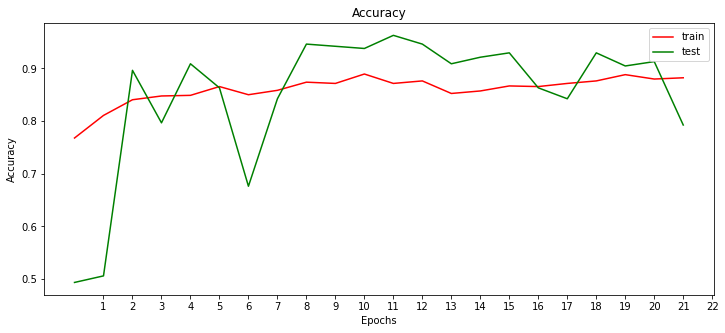

In [42]:
plt.figure(figsize=(12,5))
plt.title('Accuracy')
plt.plot(history_inception.history['accuracy'],'r-', label='train')
plt.plot(history_inception.history['val_accuracy'],'g-', label='test')
plt.xticks([i for i in range(1,23)],[i for i in range(1,23)])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show();

In [43]:
model_inc.save("/content/drive/MyDrive/Datasets/Eye Dissease/models/inception_9627.h5")

#### creating testing data for evaluating performance

In [54]:
DATADIR_test="/content/drive/MyDrive/Datasets/cataract_detection/test/"
CATEGORIES=["cataract","normal"]

In [110]:
import os
import cv2
from tqdm import tqdm

In [140]:
testing_data=[]

def create_testing_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR_test,category) # paths to covid and normal dir
    class_num = CATEGORIES.index(category)
    for img in tqdm(os.listdir(path)):
      try:
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        new_array =cv2.resize(img_array, (224,224))
        new_array=new_array*(1.0/255)
        testing_data.append([new_array,class_num])
      except Exception as e:
        print(e)

create_testing_data()

100%|██████████| 122/122 [00:07<00:00, 16.66it/s]


In [141]:
len(testing_data)

241

In [143]:
from keras.models import load_model

In [144]:
model = load_model('/content/drive/MyDrive/Datasets/Eye Dissease/models/inception_9627.h5')

In [145]:
y_pred=[]
y_actual=[]
for data in tqdm(testing_data):
  y_actual.append(data[1])
  y_pred.append(model.predict_classes(data[0].reshape(1,224,224,3))[0])

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [149]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [150]:
accuracy_score(y_actual,y_pred)

0.9626556016597511

#### Classification Report

In [152]:
print(classification_report(y_pred,y_actual))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       122
           1       0.95      0.97      0.96       119

    accuracy                           0.96       241
   macro avg       0.96      0.96      0.96       241
weighted avg       0.96      0.96      0.96       241



0 -- Cataract , 1 -- Normal

#### Confusion Matrix

In [163]:
import scikitplot as skplt

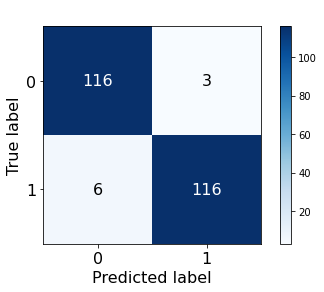

In [166]:
skplt.metrics.plot_confusion_matrix(
    y_actual, 
    y_pred,
    figsize=(7,4),
    title_fontsize='18',
    text_fontsize='16',
    title =' '
    )

#### from aboe results I can see that Inception V3 gives the best results and I got an accuracy of 96 % using it.

#### ---------------------------------------------------------------------  Thank you   -----------------------------------------------------------------